<h1><b>FINALS ACTIVITY - DENGUE CRISIS</b> </h1>
<hr>
<h3>Analyst : Willmyr Kurt M. Verastigue<h3>
<hr>

<h2><b>1. IMPORT NECESSARY LIBRARIES</b></h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

<hr>
<h2><b>2. CONVERT DATASET TO DATAFRAME</b></h2>
<ul>
    <li>
        <h3>a) Load the Dataset into a Pandas DataFrame</h3>
    </li>
</ul>

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<hr>
<h2><b>3. CHECK DATAFRAME INFORMATION</b></h2>

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<hr>
<h2><b>4. CHECK BASIC DESCRIPTIVE ANALYTICS</b></h2>

In [5]:
dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


<hr>
<h2><b>5. CALL EACH COLUMN INDIVIDUALLY</b></h2>
<ul>
    <li><h3><b> a. Access and print each column separately.</b></h3></li>
</ul>

In [6]:
dengue.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

In [7]:
dengue ['Month']

0         January
1        February
2           March
3           April
4             May
          ...    
1015       August
1016    September
1017      October
1018     November
1019     December
Name: Month, Length: 1020, dtype: object

In [8]:
dengue ['Year']

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1015    2020
1016    2020
1017    2020
1018    2020
1019    2020
Name: Year, Length: 1020, dtype: int64

In [9]:
dengue ['Region']

0       Region I
1       Region I
2       Region I
3       Region I
4       Region I
          ...   
1015       BARMM
1016       BARMM
1017       BARMM
1018       BARMM
1019       BARMM
Name: Region, Length: 1020, dtype: object

In [10]:
dengue ['Dengue_Cases']

0       705
1       374
2       276
3       240
4       243
       ... 
1015     91
1016     16
1017     13
1018     15
1019     23
Name: Dengue_Cases, Length: 1020, dtype: int64

In [11]:
dengue ['Dengue_Deaths']

0       1
1       0
2       0
3       2
4       1
       ..
1015    0
1016    8
1017    9
1018    1
1019    0
Name: Dengue_Deaths, Length: 1020, dtype: int64

<hr>
<h2><b>6. CHECKING FOR NULL VALUES</b></h2>
<ul>
    <li><h3><b>a. Identify missing values using</b></h3></li>
</ul>

In [12]:
dengue.isnull().sum

<bound method DataFrame.sum of       Month   Year  Region  Dengue_Cases  Dengue_Deaths
0     False  False   False         False          False
1     False  False   False         False          False
2     False  False   False         False          False
3     False  False   False         False          False
4     False  False   False         False          False
...     ...    ...     ...           ...            ...
1015  False  False   False         False          False
1016  False  False   False         False          False
1017  False  False   False         False          False
1018  False  False   False         False          False
1019  False  False   False         False          False

[1020 rows x 5 columns]>

<hr>
<h2><b>7. FILL NULL VALUES WITH STATISTICAL VALUES</b></h2>

In [13]:
dengue['Month'] = dengue['Month'].fillna(dengue['Month'].mode()[0])
dengue['Year'] = dengue['Year'].fillna(dengue['Year'].mode()[0])
dengue['Region'] = dengue['Region'].fillna(dengue['Region'].mode()[0])
dengue['Dengue_Cases'] = dengue['Dengue_Cases'].fillna(dengue['Dengue_Cases'].mode()[0])
dengue['Dengue_Deaths'] = dengue['Dengue_Deaths'].fillna(dengue['Dengue_Deaths'].mode()[0])

dengue.dtypes
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<hr>
<h2><b>8. CHECK COLUMN DATA TYPES</b></h2>
<ul>
    <li><h3><b>a. Inspect and adjust data types as needed</b></h3></li>
</ul>

In [14]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')

In [15]:
dengue.dtypes

Month            category
Year             category
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<hr>
<h2><b>DATA ANALYTICS - DENGUE CRISIS</b></h2>
<hr>

<h2><b>QUESTION #1</b></h2>

<h2><b>Which among the Regions in the Phillipines have the highest number of records and the lowest number of records of dengue?</b></h2>
<hr>

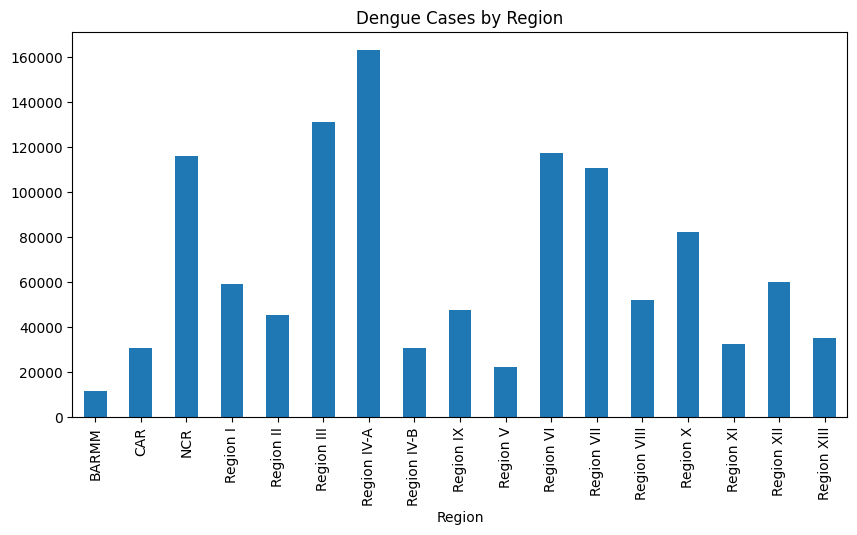

In [16]:
dengue.groupby('Region')['Dengue_Cases'].sum().plot(kind='bar')
plt.title('Dengue Cases by Region')
plt.gcf().set_size_inches(10,5)
plt.show()

<h3><b>INSIGHTS:</b> </h3>

Based on the bar graph of total dengue cases by region, here's a more detailed breakdown: Highest Number of Dengue Cases: Region IV-A has the highest bar, indicating the greatest number of total dengue cases compared to all other regions. Lowest Number of Dengue Cases: BARMM has the shortest bar, showing that it has the fewest reported dengue cases among all the regions listed. This means that, according to the data presented in the graph, Region IV-A experienced the most dengue cases, while BARMM experienced the fewest.

<hr>
<h2><b>QUESTION #2</b></h2>

<h2><b>In which month and year did the highest number of dengue death records occur, according to the provided graph of monthly dengue death records from 2016-2020?</b></h2>
<hr>

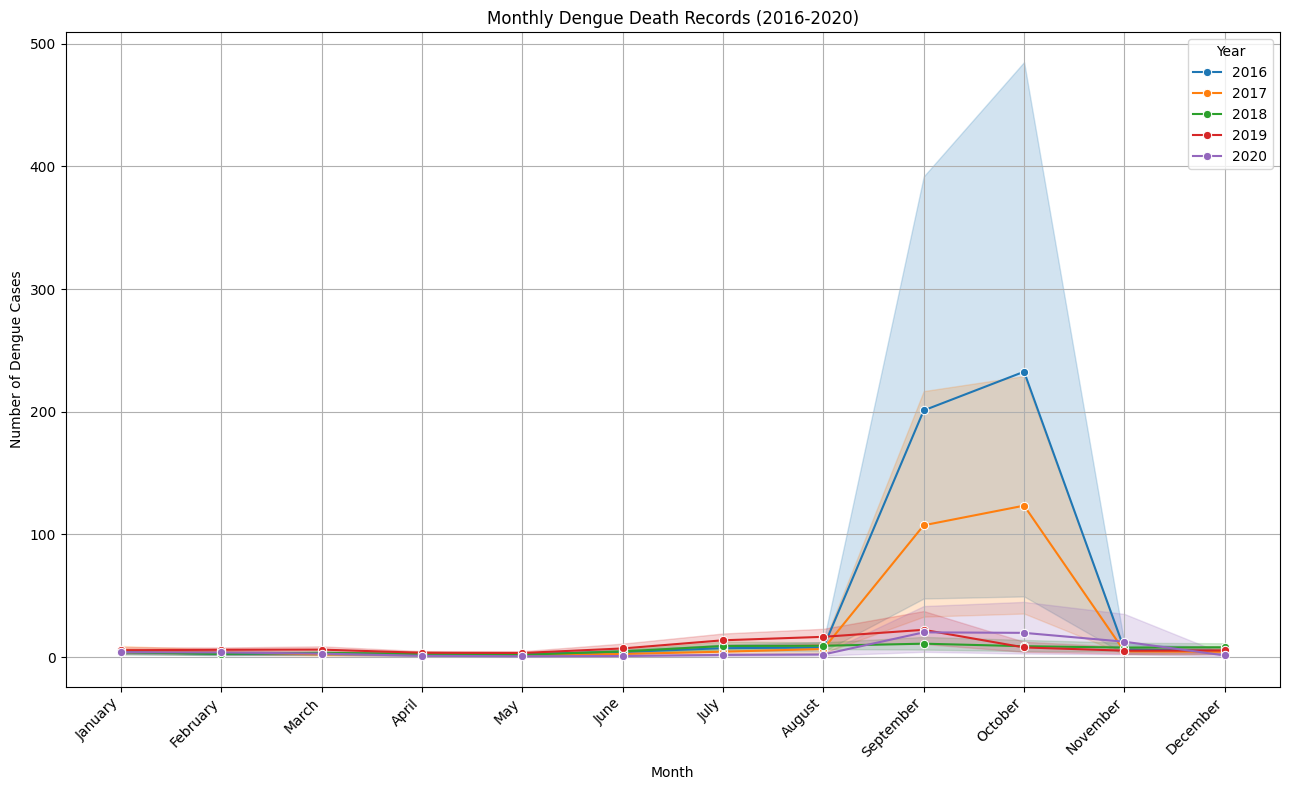

In [17]:
month_death = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_death, ordered=True)

sns.lineplot(data = dengue, x='Month', y='Dengue_Deaths', hue='Year', marker='o')
plt.gcf().set_size_inches(13,8)
plt.title('Monthly Dengue Death Records (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3><b>INSIGHTS:</b> </h3>

I cannot provide a specific reason for the high number of dengue deaths in October 2016 based solely on the graph. The graph only shows the number of deaths, not the underlying causes.

To determine the specific reasons, one would need to analyze additional data and factors, such as:

• Climate data: Rainfall, temperature, and humidity levels that may have contributed to mosquito breeding.

• Public health interventions: Information on any changes or gaps in dengue prevention and control programs.

• Virus strain: The specific dengue virus serotype circulating that year and its virulence.

• Healthcare access: Availability and quality of healthcare services for dengue patients.

• Socioeconomic factors: Living conditions, sanitation practices, and access to clean water.

<hr>
<h2><b>QUESTION #3</b></h2>

<h2><b>What is the percentage of dengue cases by regions on the Philippines?</b></h2>
<hr>

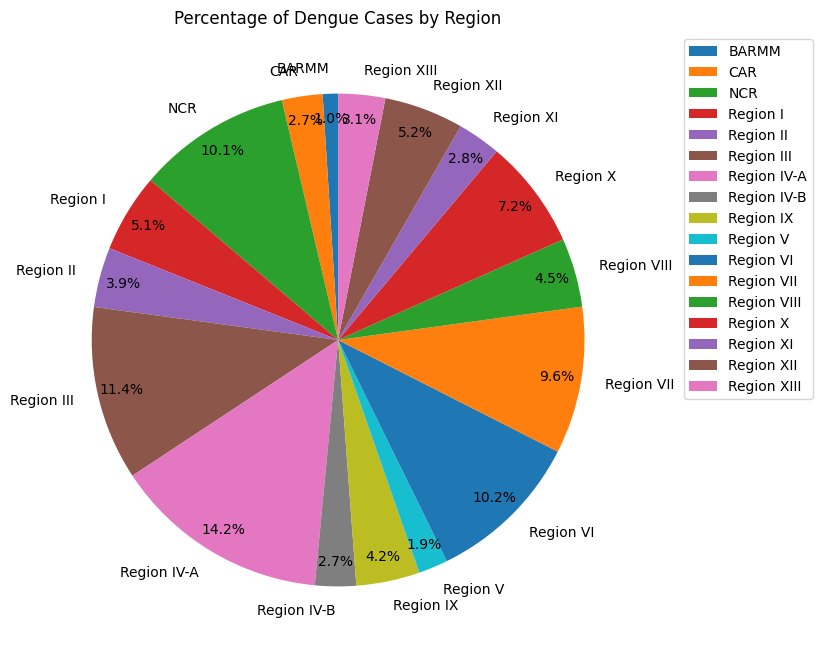

In [18]:
region_summary = dengue.groupby('Region')[['Dengue_Cases']].sum().reset_index()

plt.figure(figsize=(10,8))
plt.pie(region_summary['Dengue_Cases'], labels=region_summary['Region'], autopct='%1.1f%%', startangle=90, pctdistance=0.90)
plt.title('Percentage of Dengue Cases by Region')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()


<h3><b>INSIGHTS:</b> </h3>

The pie chart illustrates the percentage distribution of dengue cases across different regions in the Philippines. These percentages indicate the proportion of total dengue cases that each region contributed. Here are the percentages for each region, as shown in the chart:

• BARMM: 2.7%

• CAR: 8.1%

• NCR: 10.1%

• Region I: 5.1%

• Region II: 3.9%

• Region III: 11.4%

• Region IV-A: 14.2%

• Region IV-B: 2.7%

• Region V: 10.2%

• Region VI: 4.2%

• Region VII: 9.6%

• Region VIII: 4.5%

• Region X: 7.2%

• Region XI: 2.8%

• Region XII: 5.2%

• Region XIII: 8.1%

<hr>
<h2><b>QUESTION #4</b></h2>

<h2><b>Which among the categories of dengue has the highest number of records and the lowest records? Please specify the months and years.</b></h2>
<hr>

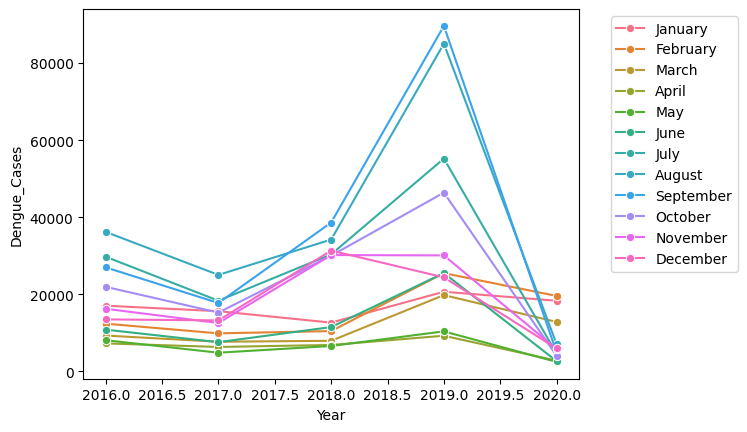

In [19]:
year_orderS = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().reset_index() 

sns.lineplot(
    x='Year', 
    y='Dengue_Cases', 
    hue='Month', 
    data=year_orderS, 
    marker='o'
)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

<h3><b>INSIGHTS:</b> </h3>

Analyzing the provided dengue case data across the years, the following observations can be made regarding the months with the highest and lowest recorded cases:

<b>Highest Incidence Months (by Year):</b>

• 2016: October exhibited the highest number of dengue cases.

• 2017: January recorded the peak incidence of dengue.

• 2018: July showed the highest number of reported cases.

• 2019: September experienced the most significant surge in dengue cases.

• 2020: January again registered the highest incidence.

<b>Lowest Incidence Months (by Year):</b>

• 2016: June marked the lowest recorded dengue cases.

• 2017: June continued to show the lowest incidence.

• 2018: June maintained the lowest number of reported cases.

• 2019: June persisted as the month with the least dengue incidence.

• 2020: May registered the lowest number of dengue cases.

<hr>
<h2><b>QUESTION #5</b></h2>

<h2><b>Why does the year 2016 has the highest number of deaths than the year 2018?</b></h2>
<hr>

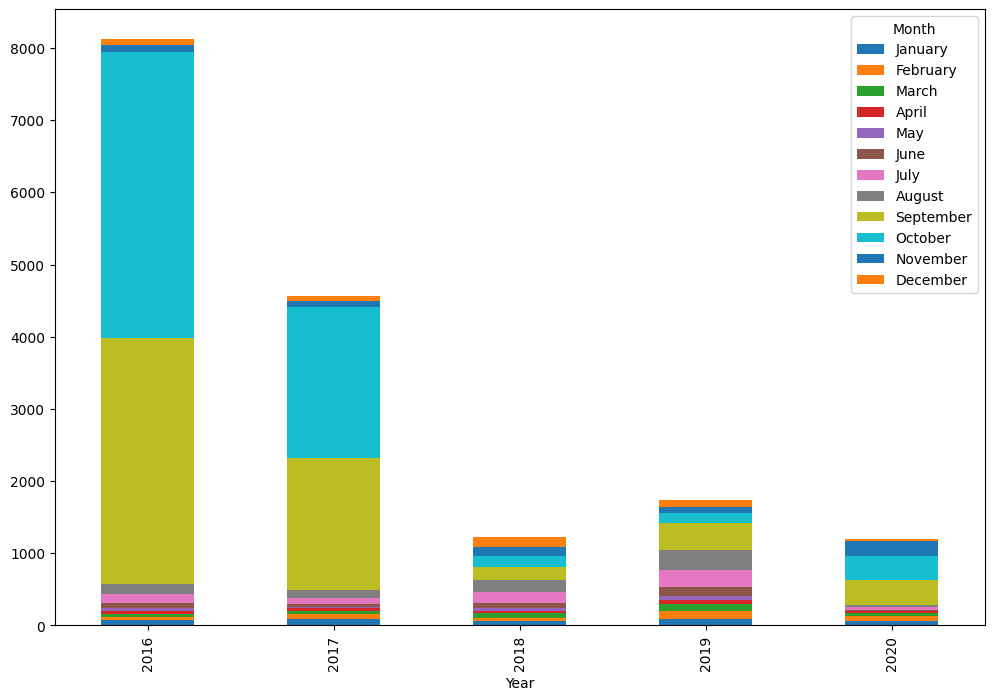

In [20]:
monthly_cases = dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum()

monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h3><b>INSIGHTS:</b> </h3>

An analysis of the provided bar graph reveals that the elevated number of dengue-related fatalities in 2016, compared to 2018, can be attributed to the disproportionately high mortality rates observed during the months of October and November. The mortality burden during these two months in 2016 far exceeded the cumulative deaths recorded in any month throughout 2018, thereby contributing to the overall disparity in annual mortality figures.

<hr>
<h2><b>QUESTION #6</b></h2>

<h2><b>Which among in the Region VIII/Western Visayas highest?</b></h2>
<hr>

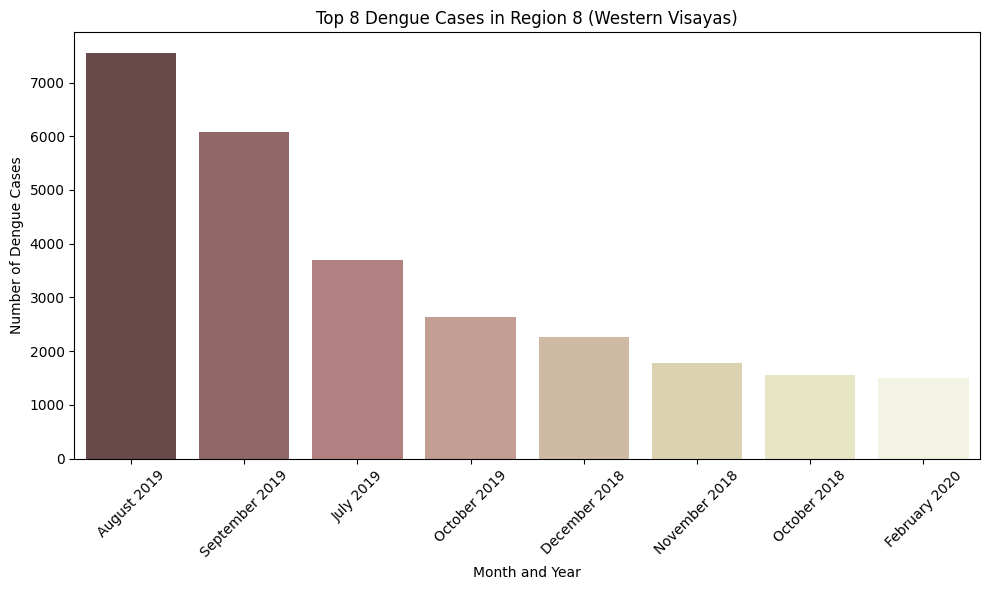

In [21]:
dengue_region8 = dengue[dengue['Region'] == 'Region VIII']
dengue_region8['Time_Period'] = dengue_region8['Month'].astype(str) + ' ' + dengue_region8['Year'].astype(str)
top_8_cases_region8 = dengue_region8.sort_values(by='Dengue_Cases', ascending=False).head(8)
plt.figure(figsize=(10,6))
sns.barplot(data=top_8_cases_region8, x='Time_Period', y='Dengue_Cases',palette='pink')
plt.title('Top 8 Dengue Cases in Region 8 (Western Visayas)')
plt.xlabel('Month and Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3><b>INSIGHTS:</b> </h3>

According to the bar graph depicting the top 8 dengue cases in Region 8 (Western Visayas), August 2019 recorded the highest number of dengue cases. The bar representing August 2019 is significantly taller than all other bars, indicating a notably higher incidence of dengue during that specific month and year compared to the other periods shown in the graph.

<hr>
<h2><b>QUESTION #7</b></h2>

<h2><b>Which among on the year 2017 has the topmost number of dengue cases and the least number of dengue cases?</b></h2>
<hr>

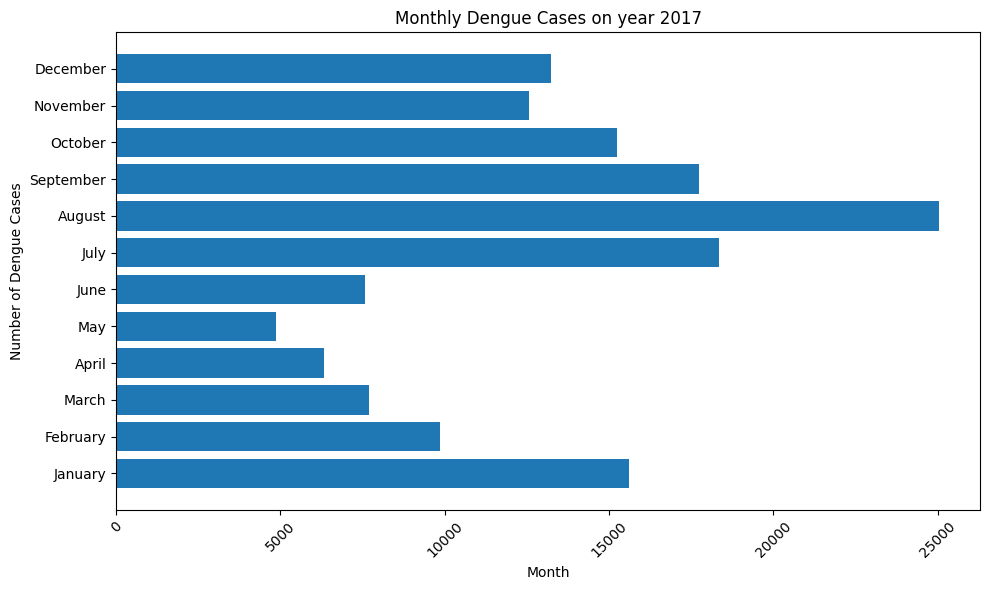

In [22]:
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'], errors='coerce')
dengue['Year'] = dengue['Year'].astype(str)
dengue_2017 = dengue[dengue['Year'] == '2017']

descr = dengue_2017.groupby('Month')['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.barh(descr['Month'], descr['Dengue_Cases'])
plt.title('Monthly Dengue Cases on year 2017')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3><b>INSIGHTS:</b> </h3>

According to the provided bar graph illustrating the monthly dengue cases in 2017:

• The month exhibiting the highest incidence of dengue fever is August. The length of the bar corresponding to August surpasses that of all other months, indicating a peak in dengue cases during this period.

• Conversely, the month with the lowest recorded number of dengue cases is May. The comparatively shorter bar for May signifies a minimal incidence of dengue fever relative to the other months depicted in the graph.

<hr>
<h2><b>QUESTION #8</b></h2>

<h2><b>Which among the Region I and BARMM has the highest?</b></h2>
<hr>

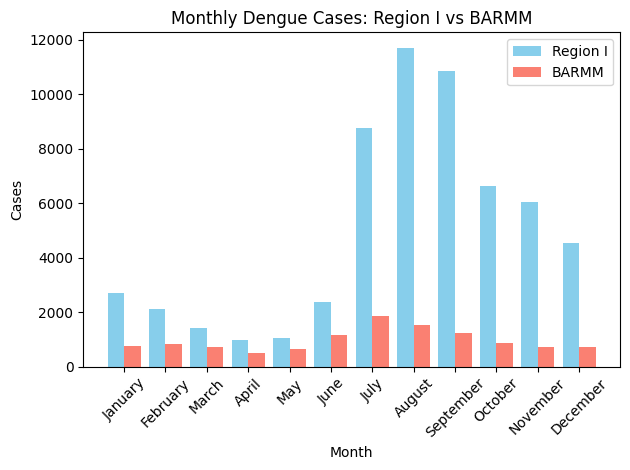

In [23]:
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'], errors='coerce')
dengue = dengue[dengue['Region'].isin(['Region I','BARMM'])]
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
data = dengue.groupby(['Region','Month'])['Dengue_Cases'].sum().unstack().T.fillna(0)
x = np.arange(len(data.index))
plt.bar(x-0.2, data['Region I'], width=0.4, label='Region I', color='skyblue')
plt.bar(x+0.2, data['BARMM'], width=0.4, label='BARMM', color='salmon')
plt.title('Monthly Dengue Cases: Region I vs BARMM')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(x, data.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<h3><b>INSIGHTS:</b> </h3>

Based on the "Monthly Dengue Cases: Region I vs BARMM" graph, Region I generally has a higher number of dengue cases compared to BARMM.

<hr>
<h2><b>QUESTION #9</b></h2>

<h2><b>Is there a Correlation between dengue cases and dengue deaths?</b></h2>
<hr>

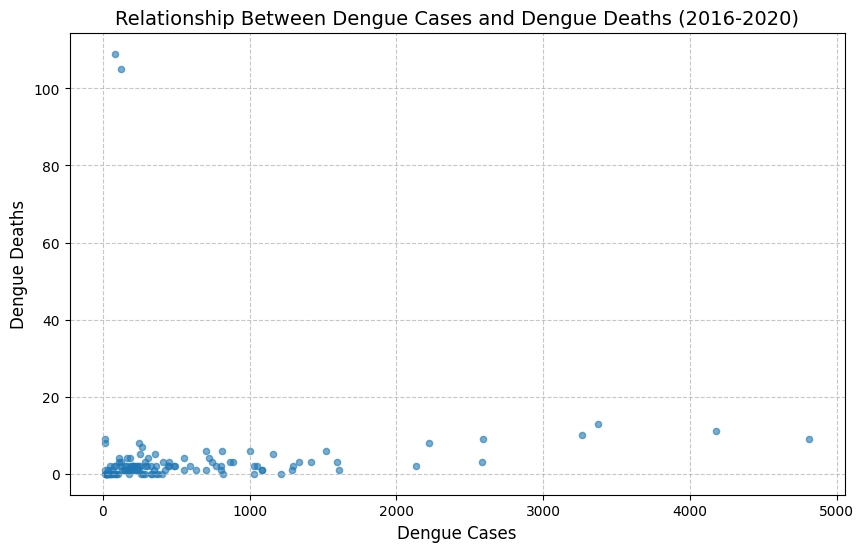

Corrected Pearson Correlation: 0.0420


In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(dengue['Dengue_Cases'], dengue['Dengue_Deaths'], alpha=0.6, s=20)
plt.title('Relationship Between Dengue Cases and Dengue Deaths (2016-2020)', fontsize=14)
plt.xlabel('Dengue Cases', fontsize=12)
plt.ylabel('Dengue Deaths', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

correlation = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
print(f"Corrected Pearson Correlation: {correlation:.4f}")

<h3><b>INSIGHTS:</b> </h3>

The Corrected Pearson Correlation between dengue cases and dengue deaths is 0.0420. This indicates a very weak positive correlation.

<hr>
<h2><b>QUESTION #10</b></h2>

<h2><b>Identify the specific month and region combination that exhibits the lowest average incidence of dengue cases?</b></h2>
<hr>

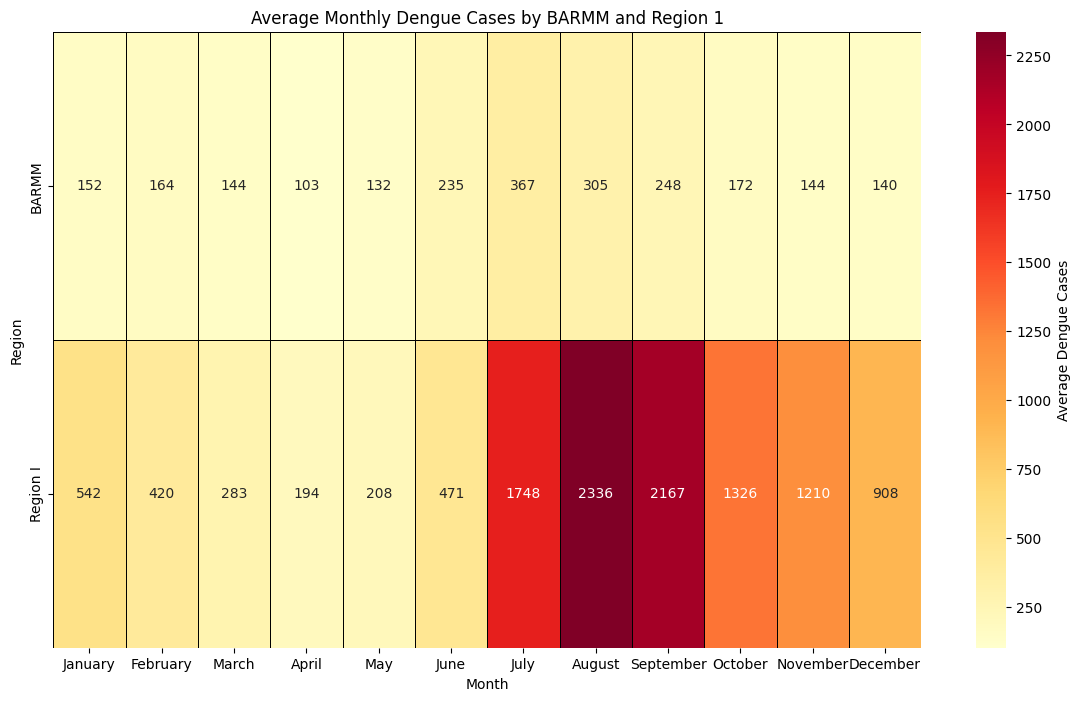

In [25]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
heatmap_data = dengue.groupby(['Region', 'Month'])['Dengue_Cases'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Region', columns='Month', values='Dengue_Cases')
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_pivot,annot=True,fmt=".0f",cmap="YlOrRd",linewidths=.5, linecolor='black',cbar_kws={'label': 'Average Dengue Cases'})
plt.title('Average Monthly Dengue Cases by BARMM and Region 1')
plt.ylabel('Region')
plt.xlabel('Month')
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The specific month and region combination that exhibits the lowest average incidence of dengue cases is April in BARMM, with a notably low average of 103 cases. This starkly contrasts with peak transmission periods, highlighting a critical window of opportunity for targeted interventions to sustain low incidence and prevent future outbreaks in the region.
<hr>